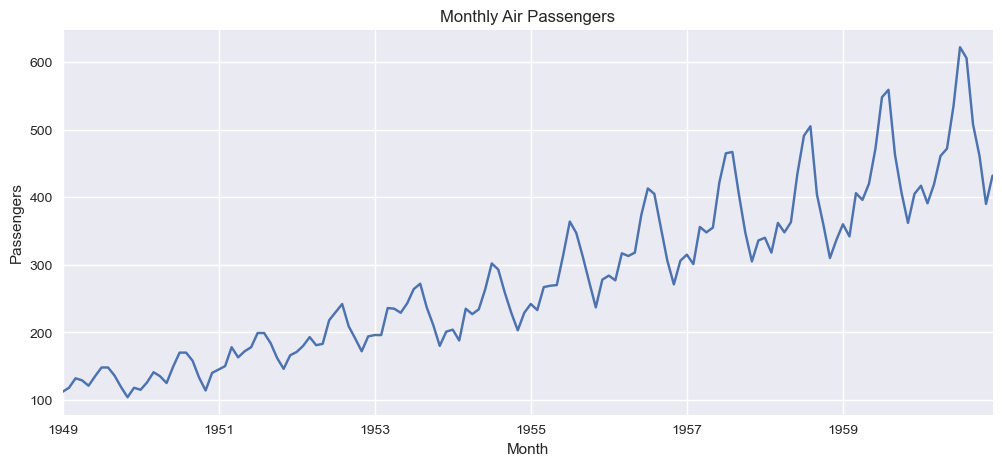

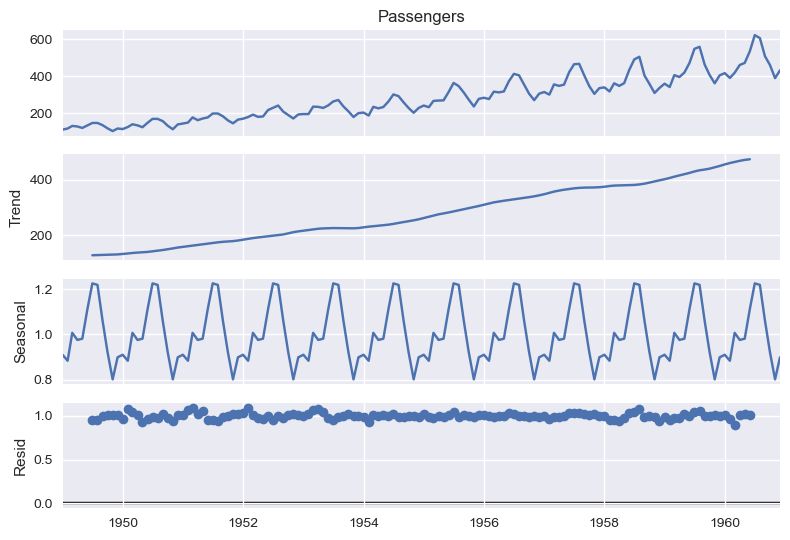

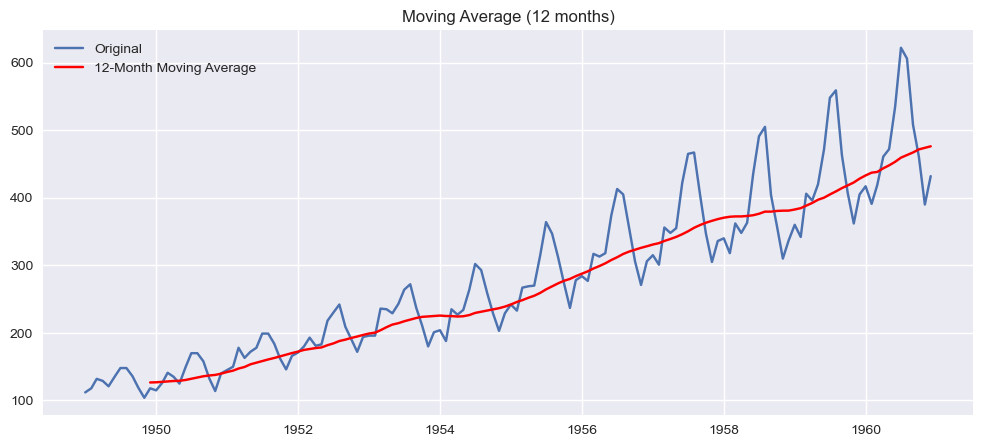

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 26 Sep 2025   AIC                           1353.347
Time:                        16:56:40   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.800      0.0

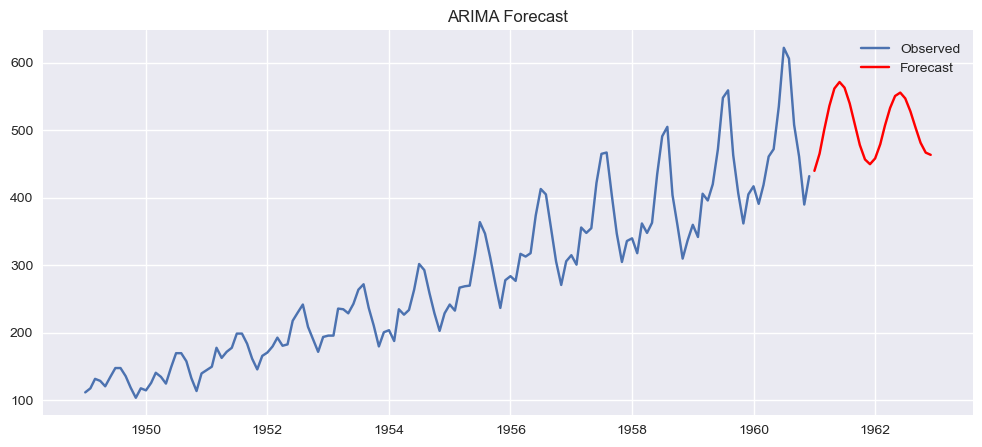

In [1]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
plt.style.use('seaborn-v0_8')

# ================================
# 2. Load the Dataset
# ================================
data = """Month,Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119
1949-11,104
1949-12,118
1950-01,115
1950-02,126
1950-03,141
1950-04,135
1950-05,125
1950-06,149
1950-07,170
1950-08,170
1950-09,158
1950-10,133
1950-11,114
1950-12,140
1951-01,145
1951-02,150
1951-03,178
1951-04,163
1951-05,172
1951-06,178
1951-07,199
1951-08,199
1951-09,184
1951-10,162
1951-11,146
1951-12,166
1952-01,171
1952-02,180
1952-03,193
1952-04,181
1952-05,183
1952-06,218
1952-07,230
1952-08,242
1952-09,209
1952-10,191
1952-11,172
1952-12,194
1953-01,196
1953-02,196
1953-03,236
1953-04,235
1953-05,229
1953-06,243
1953-07,264
1953-08,272
1953-09,237
1953-10,211
1953-11,180
1953-12,201
1954-01,204
1954-02,188
1954-03,235
1954-04,227
1954-05,234
1954-06,264
1954-07,302
1954-08,293
1954-09,259
1954-10,229
1954-11,203
1954-12,229
1955-01,242
1955-02,233
1955-03,267
1955-04,269
1955-05,270
1955-06,315
1955-07,364
1955-08,347
1955-09,312
1955-10,274
1955-11,237
1955-12,278
1956-01,284
1956-02,277
1956-03,317
1956-04,313
1956-05,318
1956-06,374
1956-07,413
1956-08,405
1956-09,355
1956-10,306
1956-11,271
1956-12,306
1957-01,315
1957-02,301
1957-03,356
1957-04,348
1957-05,355
1957-06,422
1957-07,465
1957-08,467
1957-09,404
1957-10,347
1957-11,305
1957-12,336
1958-01,340
1958-02,318
1958-03,362
1958-04,348
1958-05,363
1958-06,435
1958-07,491
1958-08,505
1958-09,404
1958-10,359
1958-11,310
1958-12,337
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559
1959-09,463
1959-10,407
1959-11,362
1959-12,405
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432"""

from io import StringIO
df = pd.read_csv(StringIO(data), parse_dates=['Month'], index_col='Month')

# Plot original time series
df['Passengers'].plot(title='Monthly Air Passengers', figsize=(12,5))
plt.ylabel('Passengers')
plt.show()

# ================================
# 3. Decomposition (Trend, Seasonal, Residual)
# ================================
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

# ================================
# 4. Moving Average (Smoothing)
# ================================
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,5))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['MA_12'], label='12-Month Moving Average', color='red')
plt.legend()
plt.title('Moving Average (12 months)')
plt.show()

# ================================
# 5. ARIMA Forecasting
# ================================

# Differencing may be needed for stationarity
# Fit ARIMA model (p,d,q)
model = ARIMA(df['Passengers'], order=(2,1,2))  # p,d,q chosen arbitrarily; tune via AIC or auto_arima
model_fit = model.fit()

print(model_fit.summary())

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)

plt.figure(figsize=(12,5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
